# Creiamo un bel grafico
---
- anno per anno con un boxplot, evidenziando le linee dei cutoff

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
CeseTot = pd.read_pickle("data/da_usare/Cese_2003-2024_data.pickle")
CeseTot.head(2)

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
0,2003,Tiozzo Giulio,1,Piemonte,5,7,7,7,6,7,7,41,ORO,03,21,20,Nord-Ovest,Gold
1,2003,Mantova Vincenzo,2,Lombardia,5,7,7,7,7,7,5,40,ORO,03,21,19,Nord-Ovest,Gold


In [4]:
CeseStat = pd.read_pickle("data/da_usare/Cese_2003-2024_stats.pickle")
CeseStat.head(2)

,anno,num,pt_bronzo,pt_argento,pt_oro,num_bronzo,num_argento,num_oro,num_menzioni
0,2003,297,13,19,25,69,42,33,22
1,2004,300,11,15,22,59,46,25,98


## Ora inizia la creazione del grafico

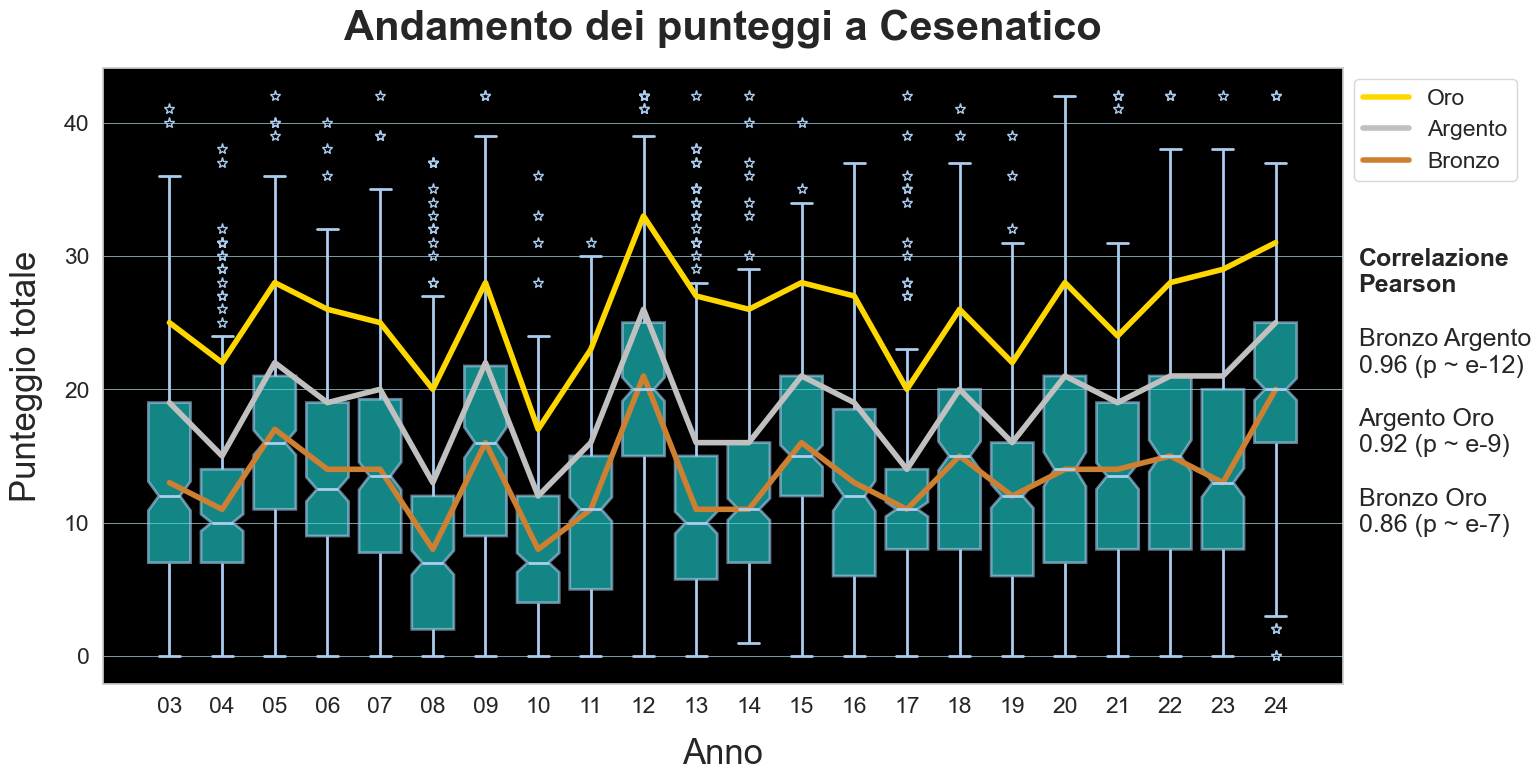

In [37]:
#plt.style.use("dark_background")
#plt.style.use("seaborn-v0_8-whitegrid")

# Info generali
sns.set( style="whitegrid", font_scale=1.5 )

fig, ax = plt.subplots(figsize = (16, 8))

ax.set_facecolor("0")
ax.grid(True, color="#ADD8E6", linewidth=0.5)

# Boxplot
sns.boxplot(CeseTot, y = "tot", x= "anno_breve", color="#00FFFF", fill=True,
            flierprops={"marker": "*"}, fliersize=8,
            boxprops={"alpha": 0.6}, notch=True,
            linecolor="#ABCDEF", linewidth=2)

# Linee dei punteggi
bronzo = CeseStat["pt_bronzo"]
argento = CeseStat["pt_argento"]
oro = CeseStat["pt_oro"]

x_linee = np.linspace(0, 21, 22)

plt.plot(x_linee, oro, linestyle="-", linewidth=4, color="Gold", label="Oro")
plt.plot(x_linee, argento, linestyle="-", linewidth=4, color="Silver", label="Argento")
plt.plot(x_linee, bronzo, linestyle="-", linewidth=4, color="#CD7F32", label="Bronzo")

# Titolo assi e titolo generale
ax.set_title("Andamento dei punteggi a Cesenatico", pad=20, fontsize=30, fontweight="bold")
ax.set_xlabel("Anno", fontsize=25, fontweight="normal", labelpad=15)
ax.set_ylabel("Punteggio totale", fontsize=25, fontweight="normal", labelpad=15)

# Text
ax.text(0.91, 0.3, "Bronzo Argento\n0.96 (p ~ e-12)\n\nArgento Oro\n0.92 (p ~ e-9)\n\nBronzo Oro\n0.86 (p ~ e-7)",
        transform=fig.transFigure, ha="left")
ax.text(0.91, 0.6, "Correlazione\nPearson", fontweight="bold",
        transform=fig.transFigure, ha="left")

# Legenda
legend = ax.legend(frameon=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

# Salvataggio figura
plt.savefig("image/AndamentoPunteggiCese.png", bbox_inches="tight", pad_inches=0.3, transparent=False)
plt.savefig("image/AndamentoPunteggiCese.svg", bbox_inches="tight", pad_inches=0.3, transparent=False)

In [6]:
print("Pearson", sp.stats.pearsonr(bronzo, argento))

Pearson PearsonRResult(statistic=0.9592044251525772, pvalue=1.94677466925154e-12)


In [7]:
print("Spearman", sp.stats.spearmanr(bronzo, argento))

Spearman SignificanceResult(statistic=0.9432776835706684, pvalue=4.9184930732155436e-11)


In [8]:
print("Kendall", sp.stats.kendalltau(bronzo, argento))

Kendall SignificanceResult(statistic=0.8762004104918103, pvalue=1.0819157372317958e-07)


### Ritengo sia meglio usare la correlazione di Pearson perché noi cerchiamo una dipendenza lineare

In [9]:
print("Pearson: bronzo/argento", sp.stats.pearsonr(bronzo, argento))
print("Pearson: argento/oro", sp.stats.pearsonr(argento, oro))
print("Pearson: bronzo/oro", sp.stats.pearsonr(bronzo, oro))

Pearson: bronzo/argento PearsonRResult(statistic=0.9592044251525772, pvalue=1.94677466925154e-12)
Pearson: argento/oro PearsonRResult(statistic=0.9228831019402992, pvalue=9.738647856235522e-10)
Pearson: bronzo/oro PearsonRResult(statistic=0.8552002683280633, pvalue=3.96753607752011e-07)
